## **Libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Regular Expressions for String manipulation
from scipy import stats
# from datetime import datetime, dt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings due to version problems
from sklearn import preprocessing
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import StratifiedKFold, cross_val_predict, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
!pip install category_encoders
import category_encoders as ce


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
# Install mlxtend package
!pip install mlxtend
!pip install xgboost

# Import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## **Data connection**

In [32]:

# #Mounting to google Drive if needed for google colab 
# drive.mount('/content/drive' , force_remount=True)

# # Store the path to apr 2019 snapshot CSV file
# filepath = '/content/drive/My Drive/Analytics_Based_Project /'

# expired_2019 = pd.read_csv(filepath + 'expired_2019.csv')

In [33]:
# for jupyter notebook
expired_2019 = pd.read_csv('expired_2019.csv')

#forgot to remove on prior step :)
expired_2019 = expired_2019.drop(columns=['earliest_cr_line'])

In [34]:
# prompt: print the column names that are not int or float and their data type

non_numeric_columns = expired_2019.select_dtypes(exclude=['float64', 'int64']).columns

for column in non_numeric_columns:
  print(f"{column}: {expired_2019[column].dtype}")


quarter_1: bool
quarter_2: bool
quarter_3: bool
quarter_4: bool
home_ownership_MORTGAGE: bool
home_ownership_OWN: bool
home_ownership_RENT: bool
purpose_Other: bool
purpose_credit_card: bool
purpose_debt_consolidation: bool
purpose_home_improvement: bool
purpose_other: bool
initial_list_status_f: bool
initial_list_status_w: bool


Making sure we didnt left any NANs behind

In [35]:
num_nans_removed = expired_2019.isnull().sum().sum()
expired_2019.dropna(inplace=True)
print(f"Number of NaNs removed: {num_nans_removed}")


Number of NaNs removed: 1


In [36]:
# plot of the distibution of the expected return

# import matplotlib.pyplot as plt
# # Plot the distribution of the expected return
# plt.figure(figsize=(10, 6))
# sns.distplot(expired_2019['expected_return'], color='g', bins=100)
# plt.title('Distribution of Expected Return', fontsize=16)
# plt.xlabel('Expected Return', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)
# plt.show()


This specific csv does not contain the updated expected_return without the outliers

In [37]:
#removing from the expected return outliers that are  3*std from the mean and then print the new distribution and the count of outliers removed

# Calculate the mean and standard deviation of the expected return
mean = expired_2019['expected_return'].mean()
std = expired_2019['expected_return'].std()

# Identify outliers that are more than 3 standard deviations from the mean
outliers = expired_2019[
    (expired_2019['expected_return'] > mean + 3 * std) |
    (expired_2019['expected_return'] < mean - 3 * std)
]

# Remove outliers from the DataFrame
expired_2019 = expired_2019.drop(outliers.index)

# # Print the new distribution of the expected return
# plt.figure(figsize=(10, 6))
# sns.distplot(expired_2019['expected_return'], color='g', bins=100)
# plt.title('Distribution of Expected Return (without outliers)', fontsize=16)
# plt.xlabel('Expected Return', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)
# plt.show()

# Print the count of outliers removed
print(f'Number of outliers removed: {len(outliers)}')


Number of outliers removed: 4435


## number of features+names

In [38]:
for index, column_name in enumerate(expired_2019.columns, start=1):
    print(f"{index}. {column_name}")

1. loan_amnt
2. term
3. int_rate
4. grade
5. sub_grade_encoded
6. emp_length
7. emp_status
8. annual_inc
9. loan_status
10. dti
11. delinq_2yrs
12. fico_range_low
13. open_acc
14. pub_rec
15. revol_bal
16. revol_util
17. total_acc
18. open_act_il
19. il_util
20. max_bal_bc
21. all_util
22. total_rev_hi_lim
23. total_cu_tl
24. acc_open_past_24mths
25. avg_cur_bal
26. bc_open_to_buy
27. bc_util
28. mo_sin_old_rev_tl_op
29. mo_sin_rcnt_rev_tl_op
30. mo_sin_rcnt_tl
31. mort_acc
32. num_accts_ever_120_pd
33. num_actv_bc_tl
34. num_actv_rev_tl
35. num_bc_sats
36. num_bc_tl
37. num_il_tl
38. num_op_rev_tl
39. num_rev_accts
40. num_tl_op_past_12m
41. pct_tl_nvr_dlq
42. pub_rec_bankruptcies
43. tot_hi_cred_lim
44. total_bc_limit
45. expected_return
46. yield_is_above_2
47. quarter_1
48. quarter_2
49. quarter_3
50. quarter_4
51. earliest_cr_line_months
52. home_ownership_MORTGAGE
53. home_ownership_OWN
54. home_ownership_RENT
55. purpose_Other
56. purpose_credit_card
57. purpose_debt_consolidati

## Baseline Model for Regression  

To evaluate our model we will use a grade based model that provides an estimation of the expected return based on the average of the historic data of its corresponding grade. 

Test DataFrame with Predicted Returns:
        grade  expected_return  predicted_return
290880      5         1.386601          0.931109
207806      6         0.827657          1.002065
21072       1         0.371800          0.322885
317433      3         0.810863          0.677585
154863      3         0.394722          0.677585
...       ...              ...               ...
211394      3         0.843519          0.677585
225087      2         0.567115          0.494730
158047      1         0.339586          0.322885
251817      3         0.789060          0.677585
23788       2         0.542549          0.494730

[95564 rows x 3 columns]
Mean Squared Error (MSE) of the baseline model: 0.11038742422945402
R² score of the baseline model: 0.2550822020153133


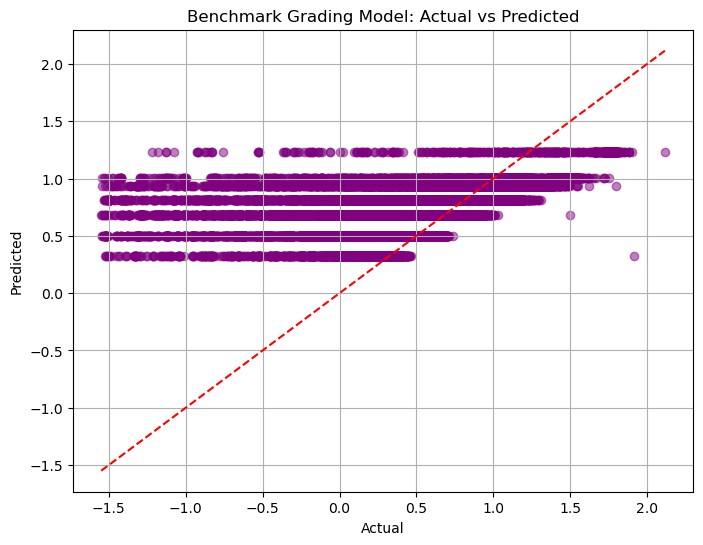

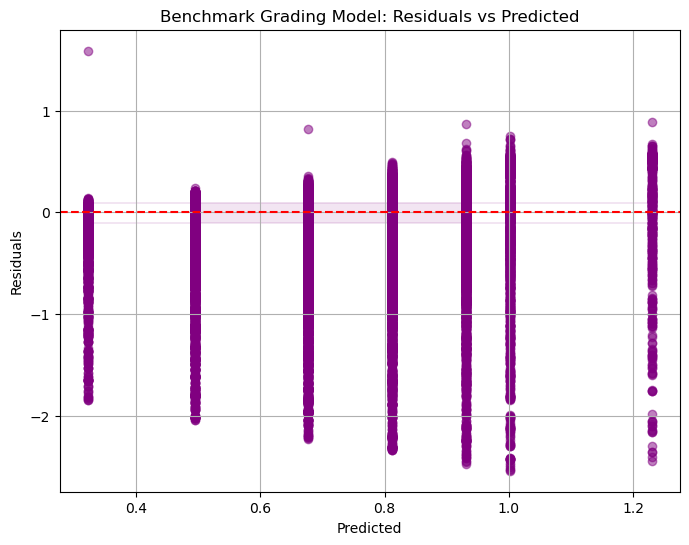

In [39]:
 import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define a function to calculate the average returns and predict the expected returns
def benchmark_grades_returns(train_data, test_data):
    # Calculate the average return for each grade using the training data
    average_returns_by_grade = train_data.groupby('grade')['expected_return'].mean().to_dict()
   
    # Function to predict the expected return for a single loan instance
    def predict_expected_return(loan_instance):
        loan_grade = loan_instance['grade']
        return average_returns_by_grade.get(loan_grade, None)
   
    # Apply the prediction function to each row in the test dataset
    test_data['predicted_return'] = test_data.apply(predict_expected_return, axis=1)
    return test_data

# Assuming expired_2019 is already defined and loaded with your dataset
# expired_2019 = pd.read_csv('path_to_your_dataset.csv')  # Example if loading from CSV

# Drop unnecessary columns
baseline_data = expired_2019.copy()
baseline_data.drop(['yield_is_above_2', 'loan_status', 'sub_grade_encoded'], axis=1, inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(baseline_data, test_size=0.3, random_state=42)

# Apply the benchmark model to the test dataset
test_data = benchmark_grades_returns(train_data, test_data)

# Display the updated DataFrame with actual and predicted returns
print("Test DataFrame with Predicted Returns:")
print(test_data[['grade', 'expected_return', 'predicted_return']])

# Calculate the Mean Squared Error (MSE) and R² score on the test set
mse = mean_squared_error(test_data['expected_return'], test_data['predicted_return'])
r2 = r2_score(test_data['expected_return'], test_data['predicted_return'])

# Display the MSE and R² score
print(f"Mean Squared Error (MSE) of the baseline model: {mse}")
print(f"R² score of the baseline model: {r2}")

# Plotting the actual vs. predicted returns for the benchmark grading model
plt.figure(figsize=(8, 6))
plt.scatter(test_data['expected_return'], test_data['predicted_return'], alpha=0.5, color='purple')
plt.plot([test_data['expected_return'].min(), test_data['expected_return'].max()],
         [test_data['expected_return'].min(), test_data['expected_return'].max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Benchmark Grading Model: Actual vs Predicted')
plt.grid(True)
plt.show()

# Plotting the residuals for the benchmark grading model
plt.figure(figsize=(8, 6))
residuals = test_data['expected_return'] - test_data['predicted_return']
plt.scatter(test_data['predicted_return'], residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.fill_between(test_data['predicted_return'], -0.1, 0.1, color='purple', alpha=0.1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Benchmark Grading Model: Residuals vs Predicted')
plt.grid(True)
plt.show()

### creating a small data frame only with expected return and unnormalized loan_amnt to use in the cumulative graphs

In [40]:
df_unnormalized = expired_2019[['loan_amnt', 'expected_return']].copy()


## **MinMax Normalization for all features- excluding 'expected return and bring it back after normalizaion**

In [41]:
expired_2019 = expired_2019.drop(columns=['expected_return'])

# Identify numeric columns to normalize
columns_to_normalize = expired_2019.select_dtypes(include=['float64', 'int64']).columns

# Create the MinMaxScaler instance
min_max_scaler = MinMaxScaler()

# Fit and transform the data
expired_2019[columns_to_normalize] = min_max_scaler.fit_transform(expired_2019[columns_to_normalize])

# Combine the normalized data with the unnormalized DataFrame
expired_2019 = pd.concat([expired_2019, df_unnormalized[['expected_return']]], axis=1)


# Regression

## Linear/Lasso/Ridge/Hubert Regression first comparison

 The main differences between these models lie in their loss functions, regularization techniques, and their abilities to handle outliers and multicollinearity. Linear Regression is the simplest model without any regularization, while Lasso and Ridge Regression add penalties to prevent overfitting. Huber Regression, on the other hand, focuses on robustness by using a different loss function that is less affected by outliers.

First will start by pre-selecting the features using **Sequential Feature Selection**.
Sequential Feature Selection is a method that selects a subset of features for a model by adding or removing features sequentially, based on a performance metric.

**Droping the classification target variable and other features that are not for modeling**

In [42]:

# Assuming expired_2019 is your DataFrame
linear_regression_seq = expired_2019.copy()
X = linear_regression_seq.drop(columns=['expected_return', 'yield_is_above_2', 'loan_status', 'sub_grade_encoded'])
y = linear_regression_seq['expected_return']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LinearRegression()

# Function to evaluate model with a specific number of features
def evaluate_features(n_features):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='forward')
    sfs.fit(X_train, y_train)
    selected_features = list(X_train.columns[sfs.get_support()])
    scores = cross_val_score(model, X_train[selected_features], y_train, cv=5)
    return scores.mean()

# Parameters for early stopping
improvement_threshold = 0.001  # Minimum improvement required to continue
patience = 5  # Number of evaluations with no significant improvement before stopping
no_improvement_steps = 0

# Evaluate performance for each number of features
feature_range = range(1, X_train.shape[1] + 1)
scores = []
best_score = -np.inf

for n in feature_range:
    score = evaluate_features(n)
    scores.append(score)
    print(f"Number of features: {n}, Cross-Validation Score: {score}")

    if score > best_score + improvement_threshold:
        best_score = score
        no_improvement_steps = 0
    else:
        no_improvement_steps += 1

    if no_improvement_steps >= patience:
        print(f"Early stopping at {n} features due to no significant improvement.")
        break

# Find the optimal number of features
optimal_n_features = feature_range[np.argmax(scores)]
print(f"Optimal number of features: {optimal_n_features}")

# Fit the final model with the optimal number of features
sfs = SequentialFeatureSelector(model, n_features_to_select=optimal_n_features, direction='forward')
sfs.fit(X_train, y_train)
optimal_features = list(X_train.columns[sfs.get_support()])
print(f"Selected features: {optimal_features}")

# Evaluate the final model on the test set
model.fit(X_train[optimal_features], y_train)
test_score = model.score(X_test[optimal_features], y_test)
print(f"Test set score: {test_score}")

Number of features: 1, Cross-Validation Score: 0.24865471564197944
Number of features: 2, Cross-Validation Score: 0.2508507607204226
Number of features: 3, Cross-Validation Score: 0.25255001766966145
Number of features: 4, Cross-Validation Score: 0.2538336004419087
Number of features: 5, Cross-Validation Score: 0.2547548911494235
Number of features: 6, Cross-Validation Score: 0.2554583059276771
Number of features: 7, Cross-Validation Score: 0.2559196571984392
Number of features: 8, Cross-Validation Score: 0.25649622882713763
Number of features: 9, Cross-Validation Score: 0.25687063191962045
Number of features: 10, Cross-Validation Score: 0.2572417562626998
Number of features: 11, Cross-Validation Score: 0.25757033169231214
Number of features: 12, Cross-Validation Score: 0.2577800286039504
Number of features: 13, Cross-Validation Score: 0.25795133904075573
Number of features: 14, Cross-Validation Score: 0.25810111144433645
Number of features: 15, Cross-Validation Score: 0.25824065431999

## Code with implemented tunning

Here's a summary of the hyperparameter tuning performed for each model:

1. **Lasso Regression**:
   - Tuned the regularization parameter `alpha` using grid search over a range of values (`np.logspace(-4, 0, 50)`).

2. **Ridge Regression**:
   - Tuned the regularization parameter `alpha` using grid search over a range of values (`np.logspace(-4, 0, 50)`).

3. **Random Forest Regression**:
   - Tuned the number of estimators (`n_estimators`: [50, 100, 150]).
   - Tuned the maximum number of features (`max_features`: ['auto', 'sqrt', 'log2']).
   - Tuned the maximum depth of the tree (`max_depth`: [10, 20, 30, None]).

**Droping the classification target variable and other features that are not for modeling**

In [43]:
linear_regression = expired_2019.copy()
linear_regression.drop(['yield_is_above_2','loan_status','sub_grade_encoded'], axis=1, inplace=True)


Best alpha value for Lasso: 0.0001
Best alpha value for Ridge: 1.0
Random Forest Regression:
Best parameters:
n_estimators: 100
max_features: sqrt
max_depth: 10
------------------------------------------------------
------------------------------------------------------
Mean MSE for Linear Regression: 0.10916334685238427
Mean MSE for Lasso Regression: 0.10923723932257849
Mean MSE for Ridge Regression: 0.1091633321188191
Mean MSE for Huber Regression: 0.13138025999786115
Mean MSE for Random Forest Regression: 0.10852271369352784
------------------------------------------------------
Mean R2 Score for Linear Regression: 0.2587458056287194
Mean R2 Score for Lasso Regression: 0.2582448226105881
Mean R2 Score for Ridge Regression: 0.2587459200088807
Mean R2 Score for Huber Regression: 0.10787207408259683
Mean R2 Score for Random Forest Regression: 0.2630980561314692


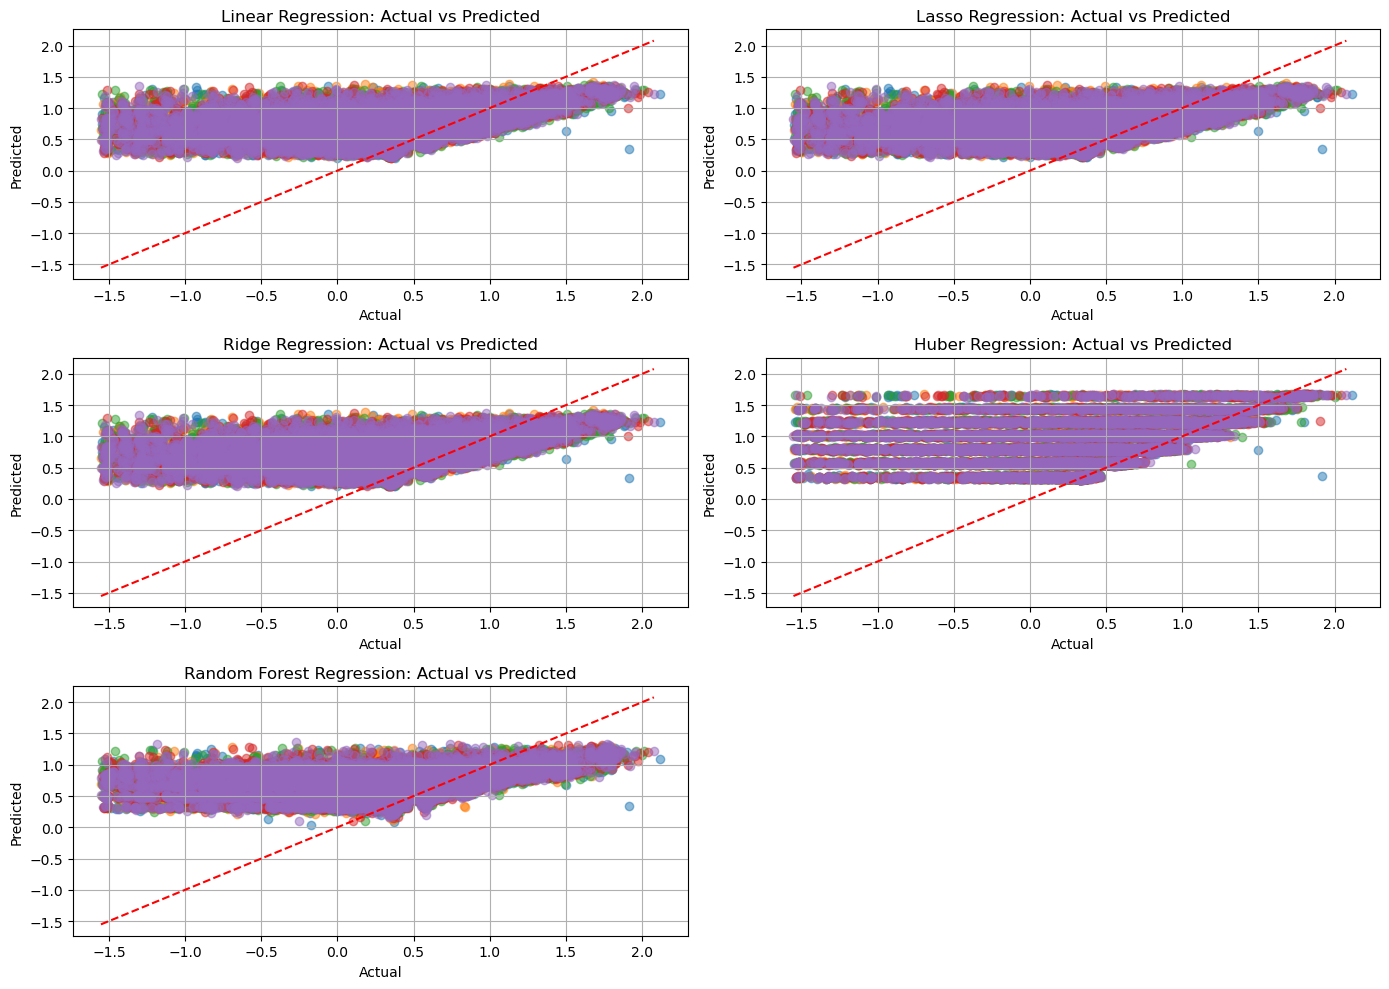

In [44]:


# Assuming linear_regression is your DataFrame and selected_features is already defined
X = linear_regression[optimal_features]
y = linear_regression['expected_return']

# Initialize lists to store performance metrics and predictions
linear_mse_scores = []
lasso_mse_scores = []
ridge_mse_scores = []
huber_mse_scores = []
rf_mse_scores = []

linear_r2_scores = []
lasso_r2_scores = []
ridge_r2_scores = []
huber_r2_scores = []
rf_r2_scores = []

linear_predictions = []
lasso_predictions = []
ridge_predictions = []
huber_predictions = []
rf_predictions = []

# Define number of folds for k-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Grid search for the best alpha value for Lasso regression
alpha_range = np.logspace(-4, 0, 50)
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alpha_range}, cv=5, scoring='r2')
grid_search.fit(X, y)
best_alpha_lasso = grid_search.best_params_['alpha']
print("Best alpha value for Lasso:", best_alpha_lasso)

# Grid search for the best alpha value for Ridge regression
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_range}, cv=5, scoring='r2')
grid_search.fit(X, y)
best_alpha_ridge = grid_search.best_params_['alpha']
print("Best alpha value for Ridge:", best_alpha_ridge)

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)
    linear_mse = mean_squared_error(y_test, linear_pred)
    linear_mse_scores.append(linear_mse)
    linear_r2 = r2_score(y_test, linear_pred)
    linear_r2_scores.append(linear_r2)
    linear_predictions.append((y_test, linear_pred))

    # Lasso Regression with the best alpha
    lasso_reg = Lasso(alpha=best_alpha_lasso)
    lasso_reg.fit(X_train, y_train)
    lasso_pred = lasso_reg.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mse_scores.append(lasso_mse)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_r2_scores.append(lasso_r2)
    lasso_predictions.append((y_test, lasso_pred))

    # Ridge Regression with the best alpha
    ridge_reg = Ridge(alpha=best_alpha_ridge)
    ridge_reg.fit(X_train, y_train)
    ridge_pred = ridge_reg.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mse_scores.append(ridge_mse)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_r2_scores.append(ridge_r2)
    ridge_predictions.append((y_test, ridge_pred))

    # Huber Regression
    huber_reg = HuberRegressor(epsilon=1.35)
    huber_reg.fit(X_train, y_train)
    huber_pred = huber_reg.predict(X_test)
    huber_mse = mean_squared_error(y_test, huber_pred)
    huber_mse_scores.append(huber_mse)
    huber_r2 = r2_score(y_test, huber_pred)
    huber_r2_scores.append(huber_r2)
    huber_predictions.append((y_test, huber_pred))

    # Random Forest Regression with the best parameters
    rf_reg = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], 
                                    max_features=best_params_rf['max_features'], 
                                    max_depth=best_params_rf['max_depth'], 
                                    random_state=42)
    rf_reg.fit(X_train, y_train)
    rf_pred = rf_reg.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_mse_scores.append(rf_mse)
    rf_r2 = r2_score(y_test, rf_pred)
    rf_r2_scores.append(rf_r2)
    rf_predictions.append((y_test, rf_pred))

# Calculate mean MSE for each model
mean_linear_mse = np.mean(linear_mse_scores)
mean_lasso_mse = np.mean(lasso_mse_scores)
mean_ridge_mse = np.mean(ridge_mse_scores)
mean_huber_mse = np.mean(huber_mse_scores)
mean_rf_mse = np.mean(rf_mse_scores)

# Calculate mean R2 score for each model
mean_linear_r2 = np.mean(linear_r2_scores)
mean_lasso_r2 = np.mean(lasso_r2_scores)
mean_ridge_r2 = np.mean(ridge_r2_scores)
mean_huber_r2 = np.mean(huber_r2_scores)
mean_rf_r2 = np.mean(rf_r2_scores)


# Print hyperparameters and results for Random Forest Regression
print("Random Forest Regression:")
print("Best parameters:")
print("n_estimators:", best_params_rf['n_estimators'])
print("max_features:", best_params_rf['max_features'])
print("max_depth:", best_params_rf['max_depth'])


print("------------------------------------------------------")

# Print mean MSE for each model
print("Mean MSE for Linear Regression:", mean_linear_mse)
print("Mean MSE for Lasso Regression:", mean_lasso_mse)
print("Mean MSE for Ridge Regression:", mean_ridge_mse)
print("Mean MSE for Huber Regression:", mean_huber_mse)
print("Mean MSE for Random Forest Regression:", mean_rf_mse)

print("------------------------------------------------------")

# Print mean R2 score for each model
print("Mean R2 Score for Linear Regression:", mean_linear_r2)
print("Mean R2 Score for Lasso Regression:", mean_lasso_r2)
print("Mean R2 Score for Ridge Regression:", mean_ridge_r2)
print("Mean R2 Score for Huber Regression:", mean_huber_r2)
print("Mean R2 Score for Random Forest Regression:", mean_rf_r2)

# Plotting test vs prediction for each model
plt.figure(figsize=(14, 10))

models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Huber Regression', 'Random Forest Regression']
predictions = [linear_predictions, lasso_predictions, ridge_predictions, huber_predictions, rf_predictions]

for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    for y_test, y_pred in predictions[i]:
        plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model}: Actual vs Predicted')
    plt.grid(True)

plt.tight_layout()
plt.show()


## cumulative investement amount vs yield in the best model

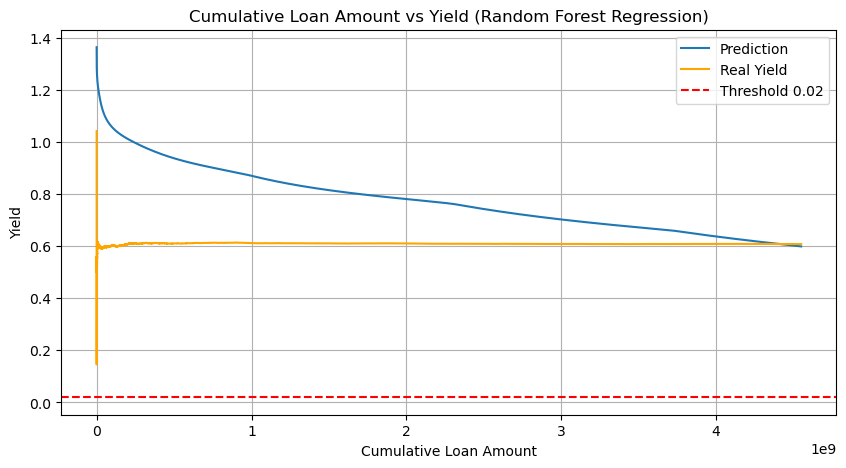

In [45]:
import matplotlib.pyplot as plt

# Create separate DataFrames for each model's predictions
df_rf = df_unnormalized.copy()

# Extract only the predicted values from the list of tuples
rf_predictions = np.concatenate([pred for _, pred in rf_predictions])

# Ensure the predictions are the same length as the original data
assert len(rf_predictions) == len(df_unnormalized)

# Add predictions to each DataFrame
df_rf['predicted_return'] = rf_predictions



# Function to calculate cumulative metrics and plot the results
def calculate_and_plot(df, model_name):
    df = df.sort_values(by='predicted_return', ascending=False).reset_index(drop=True)
    df['cumulative_investment'] = df['loan_amnt'].cumsum()
    df['weighted_cumulative_real_yield'] = (df['expected_return'] * df['loan_amnt']).cumsum() / df['cumulative_investment']
    df['weighted_cumulative_predicted_yield'] = (df['predicted_return'] * df['loan_amnt']).cumsum() / df['cumulative_investment']

    # Plot the graphs
    plt.figure(figsize=(10, 5))
    plt.plot(df['cumulative_investment'], df['weighted_cumulative_predicted_yield'], label='Prediction')
    plt.plot(df['cumulative_investment'], df['weighted_cumulative_real_yield'], label='Real Yield', color='orange')
    plt.axhline(y=0.02, color='red', linestyle='--', label='Threshold 0.02')
    plt.xlabel('Cumulative Loan Amount')
    plt.ylabel('Yield')
    plt.title(f'Cumulative Loan Amount vs Yield ({model_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot results for each model
calculate_and_plot(df_rf, 'Random Forest Regression')


**Residual Analysis:**

We'll Examine residuals (the differences between predicted and actual values) for patterns.
If the residuals show systematic patterns (e.g., heteroscedasticity), it suggests the model is not capturing all the information in the data.

**Residual Plots:**
Residual plots display the difference between the observed values (actual) and the predicted values from the model (predicted).
Each point on the plot represents a data point, with the x-axis showing the predicted values and the y-axis showing the residuals (the difference between the observed and predicted values).
This plot helps to assess if there is any pattern or structure in the residuals, which can indicate if the model assumptions are violated or if there are any trends left unexplained by the model.

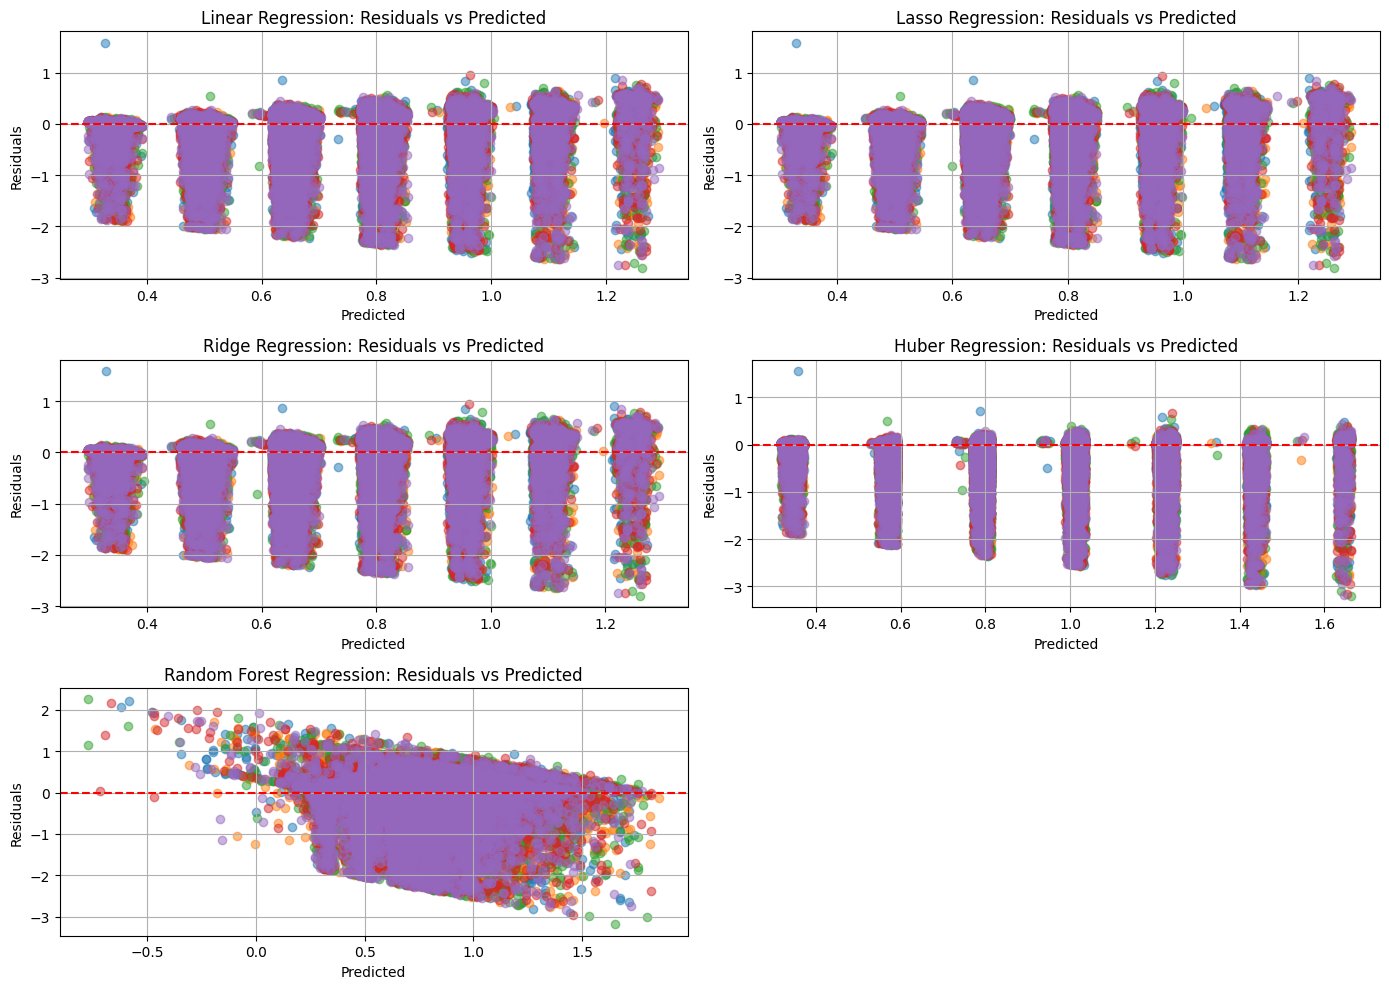

In [278]:
plt.figure(figsize=(14, 10))

models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Huber Regression', 'Random Forest Regression']
predictions = [linear_predictions, lasso_predictions, ridge_predictions, huber_predictions, rf_predictions]

for i, model in enumerate(models):
    plt.subplot(3, 2, i + 1)
    for y_test, y_pred in predictions[i]:
        residuals = y_test - y_pred
        plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'{model}: Residuals vs Predicted')
    plt.grid(True)

plt.tight_layout()
plt.show()


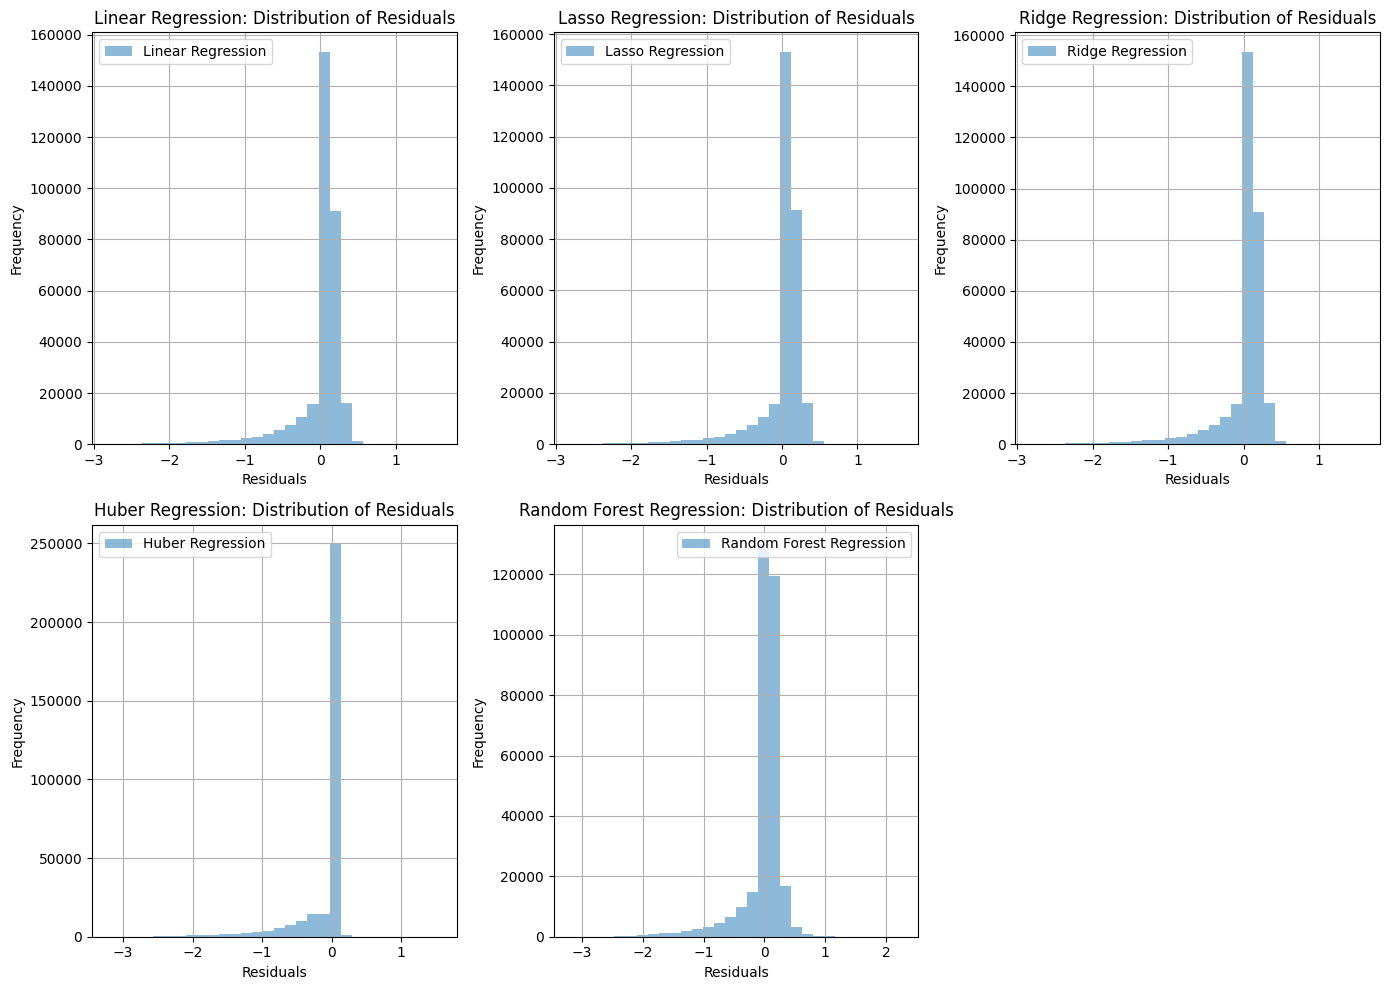

In [279]:
plt.figure(figsize=(14, 10))

models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Huber Regression', 'Random Forest Regression']
predictions = [linear_predictions, lasso_predictions, ridge_predictions, huber_predictions, rf_predictions]
num_models = len(models)

num_rows = 2
num_cols = num_models // num_rows + (num_models % num_rows > 0)  # Calculate number of columns needed

for i, (model, preds) in enumerate(zip(models, predictions), 1):
    plt.subplot(num_rows, num_cols, i)
    combined_residuals = []
    for y_test, y_pred in preds:
        residuals = y_test - y_pred
        combined_residuals.extend(residuals)
    plt.hist(combined_residuals, bins=30, alpha=0.5, label=model)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'{model}: Distribution of Residuals')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


**Distribution of Residuals:**
The distribution of residuals plot shows the distribution of the differences between the observed values and the predicted values (residuals). It helps to visualize if the residuals follow any particular distribution pattern, such as normality. A well-behaved model typically produces residuals that are normally distributed around zero. Deviations from this pattern may indicate issues with the model assumptions or with the data itself, such as heteroscedasticity or outliers.

## Classification

**Lets look again at the above 2% distribution** :

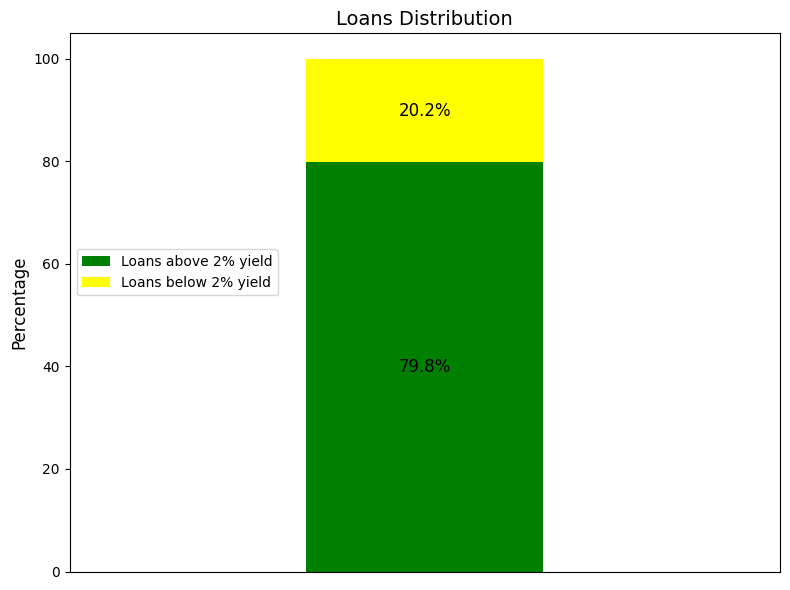

We have 254321 loans above 2% yield (79.8%)
We have 64223 loans below 2% yield (20.2%)


In [252]:

# Calculate the counts and percentages
counts = expired_2019['yield_is_above_2'].value_counts()
above_per = counts[0] / expired_2019.shape[0] * 100
below_per = counts[1] / expired_2019.shape[0] * 100

# Colors and labels for the bars
colors = ['green', 'yellow']
labels = ['Loans above 2% yield', 'Loans below 2% yield']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
ax.bar(0, above_per, width=0.8, color=colors[0], label=labels[0])
ax.bar(0, below_per, bottom=above_per, width=0.8, color=colors[1], label=labels[1])

# Set title and labels
ax.set_title("Loans Distribution", fontsize=14)
ax.set_ylabel("Percentage", fontsize=12)

# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

# Adjust plot margins
plt.margins(x=1)

# Move legend outside the plot
ax.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0, 0.5))

# Add labels to the percentages
ax.text(0, above_per/2, f'{above_per:.1f}%', ha='center', va='center', color='black', fontsize=12)
ax.text(0, above_per + below_per/2, f'{below_per:.1f}%', ha='center', va='center', color='black', fontsize=12)

# Adjust layout to fit everything
plt.tight_layout()

# The plot
plt.show()

# Print the counts and percentages
print(f"We have {counts[0]} loans above 2% yield ({above_per:.1f}%)")
print(f"We have {counts[1]} loans below 2% yield ({below_per:.1f}%)")


### Baseline –  Grade Based Model

Lets check the percentage under 2% per Grade

**We'll classify our intances based on majority representation in Grade (under 2%)**

In [174]:

# Calculate the percentage of loans under 2% yield by grade
yield_under_2_percent = expired_2019[expired_2019['yield_is_above_2'] == 1].groupby('grade').size()
total_loans_by_grade = expired_2019.groupby('grade').size()
yield_under_2_percent = (yield_under_2_percent / total_loans_by_grade) * 100

# Create a new DataFrame with the desired columns
table_expired_2019 = pd.DataFrame({
    'grade': yield_under_2_percent.index,
    'percentage of loans under 2% yield': yield_under_2_percent.values
})

# Sort grades and create a mapping from numerical grades to alphabetical grades
sorted_grades = sorted(table_expired_2019['grade'])
grade_mapping = {grade: chr(65 + i) for i, grade in enumerate(sorted_grades)}

# Apply the mapping to the grade column
table_expired_2019['grade'] = table_expired_2019['grade'].map(grade_mapping)

# Add the majority_grade_pred column
table_expired_2019['majority_grade_pred'] = table_expired_2019['percentage of loans under 2% yield'].apply(
    lambda x: 'over' if x <= 50 else 'under'
)

# Define a function to highlight the majority_grade_pred column
def highlight_majority(s):
    if s == 'over':
        return 'background-color: green'
    elif s == 'under':
        return 'background-color: red'
    return ''

# Apply the styling to the DataFrame
styled_table = table_expired_2019.style.applymap(highlight_majority, subset=['majority_grade_pred'])

# Display the styled table
styled_table


,grade,percentage of loans under 2% yield,majority_grade_pred
0,A,5.610515,over
1,B,12.965733,over
2,C,21.497393,over
3,D,29.969165,over
4,E,37.827821,over
5,F,47.199632,over
6,G,68.759571,under


### Building The Model Based On Grades

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

# Assuming 'expired_2019' is your original DataFrame

# Split the data into training and testing sets (80/20)
train_df, test_df = train_test_split(expired_2019, test_size=0.2, random_state=42)

# Calculate the percentage of loans under 2% yield by grade in the training data
yield_under_2_percent_train = train_df[train_df['yield_is_above_2'] == 0].groupby('grade').size() / train_df.groupby('grade').size()

# Classify the test data based on the condition calculated from the training data
test_df['yield_is_above_2_pred'] = test_df['grade'].map(lambda x: 0 if x not in yield_under_2_percent_train or yield_under_2_percent_train[x] <= 0.5 else 1)

# Evaluate the classification using F1 score, precision, accuracy, and recall
f1 = f1_score(test_df['yield_is_above_2'], test_df['yield_is_above_2_pred'], average='weighted')
precision = precision_score(test_df['yield_is_above_2'], test_df['yield_is_above_2_pred'], average='weighted')
accuracy = accuracy_score(test_df['yield_is_above_2'], test_df['yield_is_above_2_pred'])
recall = recall_score(test_df['yield_is_above_2'], test_df['yield_is_above_2_pred'], average='weighted')

# Print the evaluation metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)


F1 Score: 0.06147344104159973
Precision: 0.2924782169971125
Accuracy: 0.1863939913200839
Recall: 0.1863939913200839


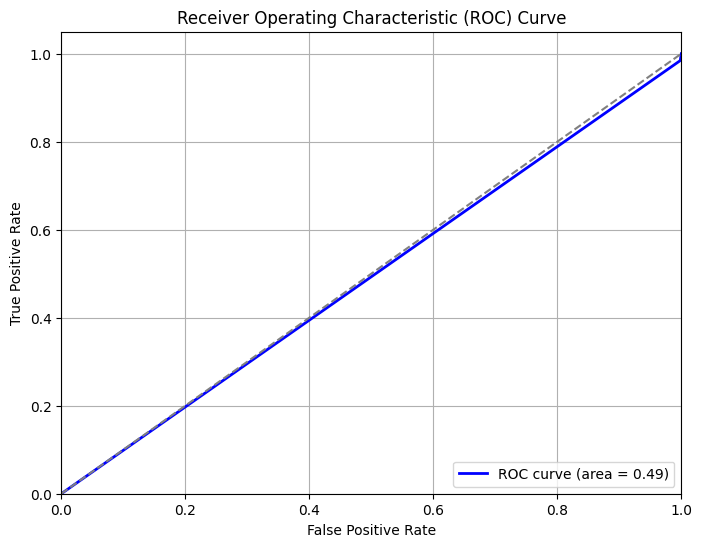

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(test_df['yield_is_above_2'], test_df['yield_is_above_2_pred'])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Next step we'll discuss using another baseline such as only top grades/sub-grades**

## FFS For Each model

#### With this code we chosed the features later used to build our models

In [ ]:


# lgc_data = expired_2019.copy()
# lgc_data.drop(['expected_return', 'loan_status', 'sub_grade_encoded'], axis=1, inplace=True)
# X = lgc_data.drop(columns=['yield_is_above_2']).values
# y = lgc_data['yield_is_above_2'].values

# def forward_selection(X, y, model, k):
#     selector = SequentialFeatureSelector(model, n_features_to_select=k, direction='forward', scoring='f1_weighted', cv=2)
#     selector.fit(X, y)
#     return list(selector.get_support(indices=True))

# def classifier_with_feature_selection(X, y, k, classifier):
#     kf = KFold(n_splits=3, shuffle=True, random_state=42)
#     f1_scores = []
#     precision_scores = []
#     accuracy_scores = []
#     recall_scores = []
#     selected_features = []

#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]

#         selected_features = forward_selection(X_train, y_train, classifier, k)
#         X_train_selected = X_train[:, selected_features]

#         classifier.fit(X_train_selected, y_train)
#         X_test_selected = X_test[:, selected_features]

#         y_pred = classifier.predict(X_test_selected)
#         f1 = f1_score(y_test, y_pred, average='weighted')
#         precision = precision_score(y_test, y_pred, average='weighted')
#         accuracy = accuracy_score(y_test, y_pred)
#         recall = recall_score(y_test, y_pred, average='weighted')
        
#         f1_scores.append(f1)
#         precision_scores.append(precision)
#         accuracy_scores.append(accuracy)
#         recall_scores.append(recall)

#     avg_f1_score = np.mean(f1_scores)
#     avg_precision = np.mean(precision_scores)
#     avg_accuracy = np.mean(accuracy_scores)
#     avg_recall = np.mean(recall_scores)

#     return avg_f1_score, avg_precision, avg_accuracy, avg_recall, selected_features

# # Logistic Regression
# lg_model = LogisticRegression(solver='liblinear', penalty="l2", class_weight='balanced')
# avg_f1_score_lg, avg_precision_lg, avg_accuracy_lg, avg_recall_lg, selected_features_lg = classifier_with_feature_selection(X, y, 15, lg_model)
# print("Logistic Regression Results:")
# print("Average F1 score:", avg_f1_score_lg)
# print("Average Precision:", avg_precision_lg)
# print("Average Accuracy:", avg_accuracy_lg)
# print("Average Recall:", avg_recall_lg)
# print("Selected features:", selected_features_lg)

# # AdaBoost Classifier
# ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
# avg_f1_score_ada, avg_precision_ada, avg_accuracy_ada, avg_recall_ada, selected_features_ada = classifier_with_feature_selection(X, y, 15, ada_model)
# print("\nAdaBoost Results:")
# print("Average F1 score:", avg_f1_score_ada)
# print("Average Precision:", avg_precision_ada)
# print("Average Accuracy:", avg_accuracy_ada)
# print("Average Recall:", avg_recall_ada)
# print("Selected features:", selected_features_ada)

# # XGBoost Classifier
# xgb_model = XGBClassifier(n_estimators=100, random_state=42)
# avg_f1_score_xgb, avg_precision_xgb, avg_accuracy_xgb, avg_recall_xgb, selected_features_xgb = classifier_with_feature_selection(X, y, 15, xgb_model)
# print("\nXGBoost Results:")
# print("Average F1 score:", avg_f1_score_xgb)
# print("Average Precision:", avg_precision_xgb)
# print("Average Accuracy:", avg_accuracy_xgb)
# print("Average Recall:", avg_recall_xgb)
# print("Selected features:", selected_features_xgb)


### This are the best features after running FFS separately for each model
**Logistic Regression Results:**
Selected features:[1, 12, 19, 20, 23, 29, 38, 40, 41, 44, 48, 53, 54, 58, 60]

**AdaBoost Results:**
Selected features: [0, 1, 3, 4, 6, 7, 19, 23, 27, 31, 40, 42, 43, 49, 53]

**XGBoost Results:**
Selected features: [0, 1, 3, 5, 7, 8, 9, 21, 28, 40, 42, 43, 45, 49, 57]

### Classifiers with tuning implemented

# Final Code and Evaluations 


## Short explanation of how the code bellow works
**Classification Function:**
Performs classification with selected features using k-fold cross-validation.
Splits data, tunes hyperparameters, fits models, and evaluates performance.

**Model Training and Evaluation:**
Train and evaluate logistic regression, AdaBoost, and XGBoost classifiers.
Print average metrics, best hyperparameters, and confusion matrices.

**Handling Class Imbalance:***
For AdaBoost and XGBoost, adjusts sample weights to account for class imbalance.
Increases weights for minority class samples during model training to ensure balanced learning.
In logistic regression, class imbalance is addressed through the class_weight parameter, which automatically adjusts weights inversely proportional to class frequencies.

**Hyperparameter Grids:**
Define parameter grids for logistic regression, AdaBoost, and XGBoost.

**Hyperparmeters tuned**
Logistic Regression:

C: Regularization parameter controlling the inverse of regularization strength. Experimented with values in the range [1e-4, 1e4].
AdaBoost:

n_estimators: Number of weak learners (decision trees) to use in boosting. Experimented with values [30, 60, 100].
learning_rate: The contribution of each weak learner to the final prediction. Experimented with values [0.01, 0.1, 1].
XGBoost:

n_estimators: Number of boosting rounds (trees) to be run. Experimented with values  [30, 60, 100].
learning_rate: Shrinkage rate to prevent overfitting. Experimented with values [0.01, 0.1, 0.3].
max_depth: Maximum depth of each tree. Experimented with values [3, 6, 9].

Logistic Regression Results:
Average F1 score: 0.7034582892798422
Average Precision: 0.7351413594789831
Average Accuracy: 0.682922924457022
Average Recall: 0.682922924457022
Best hyperparameters: {'C': 0.013257113655901081}
Confusion Matrix:
 [[62772 22001]
 [11666  9741]]

AdaBoost Results:
Average F1 score: 0.6225455282761149
Average Precision: 0.7655901784113156
Average Accuracy: 0.5819227532574601
Average Recall: 0.58192275325746
Best hyperparameters: {'learning_rate': 0.01}
Confusion Matrix:
 [[46313 38460]
 [ 5931 15476]]

XGBoost Results:
Average F1 score: 0.6321853489736368
Average Precision: 0.765521249502637
Average Accuracy: 0.5922070430384675
Average Recall: 0.5922070430384675
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3}
Confusion Matrix:
 [[47643 37130]
 [ 6169 15238]]


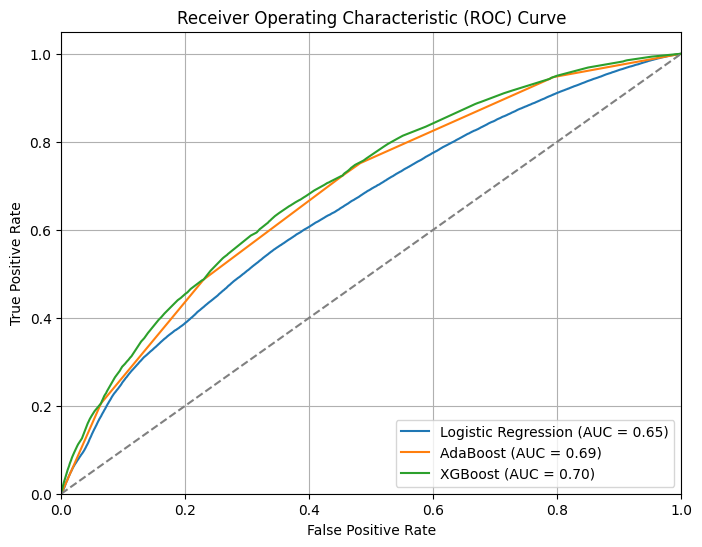

In [250]:


# Assuming expired_2019 is your DataFrame
lgc_data = expired_2019.copy()
lgc_data.drop(['expected_return', 'loan_status', 'sub_grade_encoded'], axis=1, inplace=True)
X = lgc_data.drop(columns=['yield_is_above_2']).values
y = lgc_data['yield_is_above_2'].values

# Predefined selected features for each classifier
selected_features_lg = [1, 12, 19, 20, 23, 29, 38, 40, 41, 44, 48, 53, 54, 55, 56]
selected_features_ada = [0, 1, 3, 4, 6, 7, 19, 23, 27, 31, 40, 42, 43, 49, 53]
selected_features_xgb = [0, 1, 3, 5, 7, 8, 9, 21, 28, 40, 42, 43, 45, 49, 54]

def classifier_with_selected_features(X, y, selected_features, classifier, param_grid):
    """
    Performs classification with predefined selected features using k-fold cross-validation.

    Returns:
        tuple: A tuple containing the average F1 score, precision, accuracy, recall, best hyperparameters, and confusion matrices.
    """
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []
    precision_scores = []
    accuracy_scores = []
    recall_scores = []
    best_params = None
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_selected = X_train[:, selected_features]

        # Hyperparameter tuning
        grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='f1_weighted')
        grid_search.fit(X_train_selected, y_train)
        best_params = grid_search.best_params_

        best_model = grid_search.best_estimator_
        X_test_selected = X_test[:, selected_features]

        if isinstance(classifier, LogisticRegression):
            # No need to handle class imbalance for logistic regression
            best_model.fit(X_train_selected, y_train)
        else:
            # Adjusting sample weights for class imbalance
            class_weights = {0: 1.0, 1: 1.0}  # Initialize sample weights
            class_weights[0] *= len(y_train) / (2 * np.sum(y_train == 0))  # Adjust weights for class 0
            class_weights[1] *= len(y_train) / (2 * np.sum(y_train == 1))  # Adjust weights for class 1
            
            best_model.fit(X_train_selected, y_train, sample_weight=[class_weights[i] for i in y_train])

        y_pred = best_model.predict(X_test_selected)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        
        f1_scores.append(f1)
        precision_scores.append(precision)
        accuracy_scores.append(accuracy)
        recall_scores.append(recall)
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    avg_f1_score = np.mean(f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_accuracy = np.mean(accuracy_scores)
    avg_recall = np.mean(recall_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0).astype(int)

    return avg_f1_score, avg_precision, avg_accuracy, avg_recall, best_params, avg_confusion_matrix


# Hyperparameter grids
param_grid_logistic = {'C': np.logspace(-4, 4, 50)}
param_grid_adaboost = {'learning_rate': [0.01, 0.1, 1]}
param_grid_xgboost = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 6, 9]}

# Logistic Regression
avg_f1_score_lg, avg_precision_lg, avg_accuracy_lg, avg_recall_lg, best_params_lg, conf_matrix_lg = classifier_with_selected_features(
    X, y, selected_features_lg, LogisticRegression(solver='liblinear', penalty="l2", class_weight='balanced'), param_grid_logistic)
print("Logistic Regression Results:")
print("Average F1 score:", avg_f1_score_lg)
print("Average Precision:", avg_precision_lg)
print("Average Accuracy:", avg_accuracy_lg)
print("Average Recall:", avg_recall_lg)
print("Best hyperparameters:", best_params_lg)
print("Confusion Matrix:\n", conf_matrix_lg)

# AdaBoost Classifier
avg_f1_score_ada, avg_precision_ada, avg_accuracy_ada, avg_recall_ada, best_params_ada, conf_matrix_ada = classifier_with_selected_features(
    X, y, selected_features_ada, AdaBoostClassifier(n_estimators=100, random_state=42), param_grid_adaboost)
print("\nAdaBoost Results:")
print("Average F1 score:", avg_f1_score_ada)
print("Average Precision:", avg_precision_ada)
print("Average Accuracy:", avg_accuracy_ada)
print("Average Recall:", avg_recall_ada)
print("Best hyperparameters:", best_params_ada)
print("Confusion Matrix:\n", conf_matrix_ada)

# XGBoost Classifier
avg_f1_score_xgb, avg_precision_xgb, avg_accuracy_xgb, avg_recall_xgb, best_params_xgb, conf_matrix_xgb = classifier_with_selected_features(
    X, y, selected_features_xgb, XGBClassifier(n_estimators=100, random_state=42), param_grid_xgboost)
print("\nXGBoost Results:")
print("Average F1 score:", avg_f1_score_xgb)
print("Average Precision:", avg_precision_xgb)
print("Average Accuracy:", avg_accuracy_xgb)
print("Average Recall:", avg_recall_xgb)
print("Best hyperparameters:", best_params_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# ROC Curve
def plot_roc_curve(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=label + ' (AUC = %0.2f)' % roc_auc)

y_score_lg = LogisticRegression(solver='liblinear', penalty="l2", class_weight='balanced', **best_params_lg).fit(X[:, selected_features_lg], y).decision_function(X[:, selected_features_lg])
y_score_ada = AdaBoostClassifier(n_estimators=100, random_state=42, **best_params_ada).fit(X[:, selected_features_ada], y).decision_function(X[:, selected_features_ada])
y_score_xgb = XGBClassifier(n_estimators=100, random_state=42, **best_params_xgb).fit(X[:, selected_features_xgb], y).predict_proba(X[:, selected_features_xgb])[:, 1]

plt.figure(figsize=(8, 6))
plot_roc_curve(y, y_score_lg, 'Logistic Regression')
plot_roc_curve(y, y_score_ada, 'AdaBoost')
plot_roc_curve(y, y_score_xgb, 'XGBoost')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




**Cleaner view of results**

In [272]:

# Define the data
data = {
    'Metric': ['Average F1 score', 'Average Recall', 'Average Precision', 'Average Accuracy'],
    'Logistic Regression': [0.7034582892798422, 0.682922924457022, 0.7351413594789831, 0.682922924457022],
    'AdaBoost': [0.6225455282761149, 0.58192275325746, 0.7655901784113156, 0.58192275325746],
    'XGBoost': [0.6321853489736368, 0.5922070430384675, 0.765521249502637, 0.5922070430384675],
    'Grades Baseline': [0.07232706092668666, 0.20140011615313377, 0.4067106462847662, 0.20140011615313377]
}

# Create DataFrame
df = pd.DataFrame(data)

# Find the maximum value in each row, ignoring the first column (Metrics)
max_values = df.iloc[:, 1:].max(axis=1)

# Function to apply colors
def highlight_max(data, max_values, color='green'):
    attr = f'background-color: {color}'
    is_max = data.iloc[:, 1:].eq(max_values, axis=0)
    return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns[1:])

# Apply the highlight function
styled_table = df.style.apply(highlight_max, max_values=max_values, axis=None)


# Display confusion matrices
logistic_regression_cm = np.array([[62772, 22001], [11666, 9741]])
adaboost_cm = np.array([[46313, 38460], [5931, 15476]])
xgboost_cm = np.array([[47643, 37130], [6169, 15238]])

print("\nLogistic Regression Confusion Matrix:")
print(logistic_regression_cm)
print("\nAdaBoost Confusion Matrix:")
print(adaboost_cm)
print("\nXGBoost Confusion Matrix:")
print(xgboost_cm)

# Display the table
styled_table



Logistic Regression Confusion Matrix:
[[62772 22001]
 [11666  9741]]

AdaBoost Confusion Matrix:
[[46313 38460]
 [ 5931 15476]]

XGBoost Confusion Matrix:
[[47643 37130]
 [ 6169 15238]]


,Metric,Logistic Regression,AdaBoost,XGBoost,Grades Baseline
0,Average F1 score,0.703458,0.622546,0.632185,0.072327
1,Average Recall,0.682923,0.581923,0.592207,0.201400
2,Average Precision,0.735141,0.765590,0.765521,0.406711
3,Average Accuracy,0.682923,0.581923,0.592207,0.201400


## Another method for feauture selection 
### (this will be tested in the next step)

### Feature contribution
Lets again have look at how the features impact our target variable. This approach holds less computional cost compared to RFE and FFS since it doesnt include running the model multiple times. In the next step will experiment with this features and try as well using both methods to run RFE and FFS with a smaller pool of feautures

In [216]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the data into a DataFrame
# Assuming 'expired_2019' is your DataFrame and 'yield_is_above_2' is the target variable
# Replace 'features' with the list of feature columns in your dataset
features = expired_2019.drop(columns=['yield_is_above_2']).columns.tolist()
target = 'yield_is_above_2'

# Calculate the correlation between each feature and the target variable
correlations = {}
for feature in features:
    corr = expired_2019[feature].corr(expired_2019[target])
    correlations[feature] = corr

correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
print("Correlation between each feature and the target variable:")
print(correlation_df)

# Perform chi-square test to determine the significance of each feature
significance = {}
for feature in features:
    contingency_table = pd.crosstab(expired_2019[feature], expired_2019[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    significance[feature] = p

significance_df = pd.DataFrame(significance.items(), columns=['Feature', 'P-Value'])
significance_df = significance_df.sort_values(by='P-Value')
print("\nChi-square test significance of each feature with respect to the target variable:")
print(significance_df)


Correlation between each feature and the target variable:
                       Feature  Correlation
8                  loan_status     0.975815
4            sub_grade_encoded     0.270529
2                     int_rate     0.266412
3                        grade     0.264253
1                         term     0.182485
23        acc_open_past_24mths     0.110161
9                          dti     0.100463
39          num_tl_op_past_12m     0.093028
20                    all_util     0.074292
33             num_actv_rev_tl     0.072671
52         home_ownership_RENT     0.071643
0                    loan_amnt     0.062907
26                     bc_util     0.058805
18                     il_util     0.052750
15                  revol_util     0.051008
47                   quarter_3     0.049014
32              num_actv_bc_tl     0.045288
37               num_op_rev_tl     0.040027
55  purpose_debt_consolidation     0.039733
58       initial_list_status_f     0.033318
12                

## Feature selection based on correleation
We have the correlation coefficients and p-values from the chi-square test for each feature with respect to the target variable, we will use this information to guide our feature selection process:

1. Correlation Coefficients- Features with a high positive correlation coefficient (close to 1) indicate a strong positive relationship with the target variable. In addition, Features with a high negative correlation coefficient (close to -1) indicate a strong negative relationship with the target variable. **These features may also be valuable for prediction and we should keep them.**

2. Chi-square Test P-Values- Features with low p-values (typically below a significance threshold, e.g., 0.05, we can reject the Null Hypothesis) from the chi-square test are considered statistically significant. **These features have a significant association with the target variable and we should keep them.**


**we will use a combination of correlation coefficients and p-values to prioritize feature selection**

In [217]:
# Set a significance threshold
significance_threshold = 0.05
correlation_threshold = 0.3

# Select features with high correlation coefficients
high_corr_features = correlation_df[abs(correlation_df['Correlation']) >= correlation_threshold]['Feature'].tolist()

# Select features with low chi-square test p-values
significant_features = significance_df[significance_df['P-Value'] < significance_threshold]['Feature'].tolist()

# Combine selected features
selected_features = list(set(high_corr_features) | set(significant_features))

print("Selected Features:")
print(len(selected_features))
print(selected_features)


Selected Features:
50
['mo_sin_rcnt_rev_tl_op', 'int_rate', 'initial_list_status_w', 'earliest_cr_line_months', 'num_actv_bc_tl', 'il_util', 'mo_sin_old_rev_tl_op', 'pub_rec', 'quarter_3', 'total_acc', 'open_act_il', 'num_actv_rev_tl', 'num_accts_ever_120_pd', 'all_util', 'term', 'home_ownership_MORTGAGE', 'quarter_4', 'home_ownership_RENT', 'grade', 'purpose_debt_consolidation', 'emp_length', 'loan_amnt', 'initial_list_status_f', 'delinq_2yrs', 'expected_return', 'emp_status', 'purpose_home_improvement', 'open_acc', 'pub_rec_bankruptcies', 'num_bc_sats', 'num_il_tl', 'num_op_rev_tl', 'mo_sin_rcnt_tl', 'total_rev_hi_lim', 'quarter_1', 'sub_grade_encoded', 'annual_inc', 'bc_util', 'quarter_2', 'fico_range_low', 'dti', 'mort_acc', 'revol_util', 'loan_status', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'purpose_other', 'acc_open_past_24mths', 'purpose_credit_card', 'total_bc_limit']
